In [8]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler

In [9]:
# load the dataset
df = pd.read_csv("Boston.csv")

# Display the first five rows

df.head() # for ten rows - df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [16]:
# Get number of rows and columns
rows, cols = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 506
Number of columns: 14


In [17]:
# check the missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [39]:
X = df.drop(columns=['PRICE'])  
y = df['PRICE']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

In [42]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 24.29
R-squared Score: 0.67


In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Print the count of outliers in each column
print(outliers.sum())

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
PRICE      40
dtype: int64


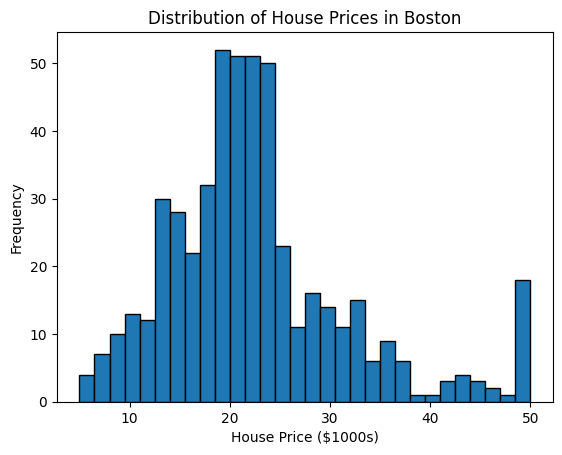

In [44]:
plt.hist(df['PRICE'], bins=30, edgecolor='black')
plt.xlabel("House Price ($1000s)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices in Boston")
plt.show()

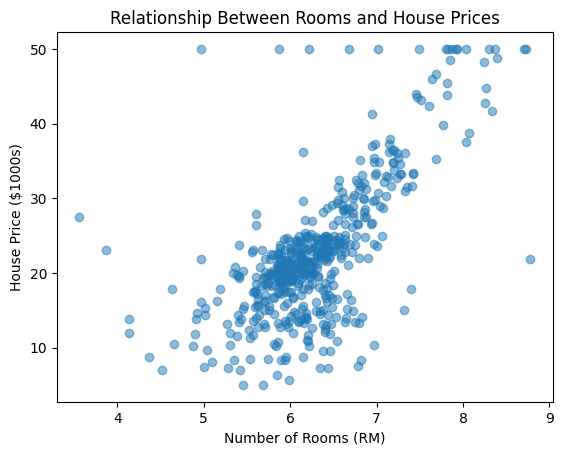

In [45]:
plt.scatter(df['RM'], df['PRICE'], alpha=0.5)
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("House Price ($1000s)")
plt.title("Relationship Between Rooms and House Prices")
plt.show()

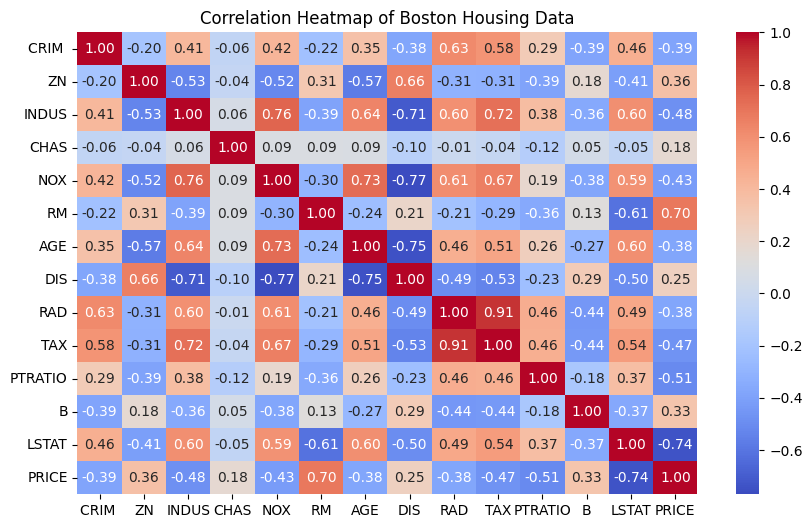

In [46]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Boston Housing Data")
plt.show()

In [47]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree model
model = DecisionTreeRegressor(max_depth=4, random_state=42)  # Adjust max_depth as needed
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [48]:
y_pred = model.predict(X_test)

In [49]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 19.75
R-squared Score: 0.73


In [57]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
y_pred = model.predict(X_test)

In [60]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("For Random Forest Regressor")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

For Random Forest Regressor
Mean Squared Error: 7.90
R-squared Score: 0.89
